In [1]:
%%capture
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
prof1 = xr.open_dataset('3901231.nc')
prof2 = xr.open_dataset('6902809.nc')

In [3]:
prof1, prof2

(<xarray.Dataset>
 Dimensions:      (date: 116, depth: 801, lat: 1, lon: 1)
 Coordinates:
   * date         (date) datetime64[ns] 2016-03-12T10:31:44 ... 2019-03-13T19:42:08.000000256
   * lat          (lat) int64 0
   * lon          (lon) int64 0
   * depth        (depth) float64 0.0 2.5 5.0 7.5 ... 1.995e+03 1.998e+03 2e+03
 Data variables:
     temperature  (date, lat, lon, depth) float64 ...
     temp_anom    (date, lat, lon, depth) float64 ...
     psal         (date, lat, lon, depth) float64 ...
     lat_p        (date) float64 ...
     lon_p        (date) float64 ..., <xarray.Dataset>
 Dimensions:      (date: 78, depth: 801, lat: 1, lon: 1)
 Coordinates:
   * date         (date) datetime64[ns] 2017-04-25T21:06:00 ... 2019-03-11T21:34:00
   * lat          (lat) int64 0
   * lon          (lon) int64 0
   * depth        (depth) float64 0.0 2.5 5.0 7.5 ... 1.995e+03 1.998e+03 2e+03
 Data variables:
     temperature  (date, lat, lon, depth) float64 ...
     temp_anom    (date, lat, l

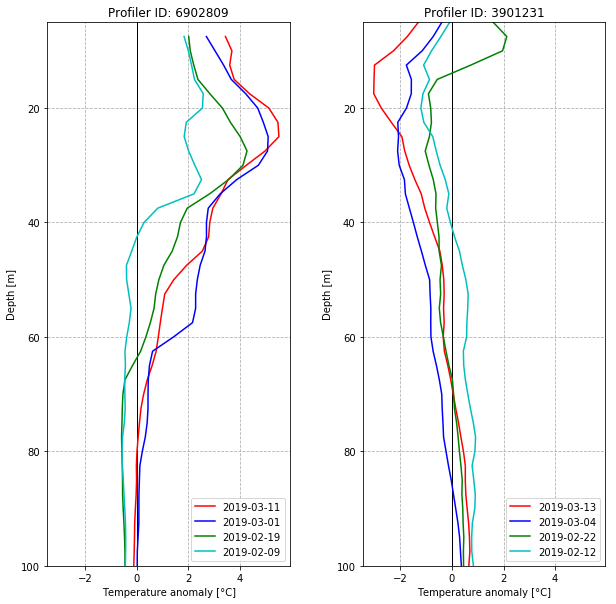

In [13]:
import pandas as pd
var1 = prof1.sel(depth=slice(0,200)).temp_anom
var2 = prof2.sel(depth=slice(0,200)).temp_anom
colors = ['r','b','g','c']

fig, ax = plt.subplots(figsize=(10,10),ncols=2,sharex=True,gridspec_kw={'wspace': 0.3})
for var, axs, i in zip([var2,var1],ax,range(2)):
    axs.vlines(0,prof1.depth.data.min(),prof1.depth.data.max(),lw=1)
    axs.set_ylim(5,100)
    for dtime, color in zip(var.date[:-5:-1],colors):
        var.sel(date=dtime).plot(ax=axs, y='depth', yincrease=False, label=pd.to_datetime(dtime.data).date(),color=color)
    axs.set_xlabel('Temperature anomaly [°C]')
    axs.set_ylabel('Depth [m]')
    if i == 0:
        axs.set_title('Profiler ID: 6902809')
    else:
        axs.set_title('Profiler ID: 3901231')
    axs.grid(ls='--')
    axs.legend(loc=4)


# fig, ax = plt.subplots(figsize=(20,10),ncols=4,sharey=True,gridspec_kw={'wspace': 0.1})
# for dtime, axs in zip(var1.date[::-1],ax.flat):
#     dstamp = pd.to_datetime(dtime.data).date()
#     axs.vlines(0,prof1.depth.data.min(),prof1.depth.data.max(),lw=1)
#     axs.set_ylim(5,150)
#     axs.set_xlim(-8.5,3.5)
#     var1.sel(date=dtime).plot(ax=axs, y='depth', yincrease=False, label=dstamp)
#     axs.set_title(dstamp,size=16)
#     axs.grid(ls='--')
#     axs.tick_params(labelsize=16)
#     axs.legend()

In [51]:
prof1.groupby('date.month').groups

{1: [34, 35, 36, 71, 72, 73, 108, 109, 110],
 2: [37, 38, 39, 74, 75, 76, 111, 112, 113],
 3: [0, 1, 2, 3, 4, 5, 40, 41, 42, 77, 78, 79, 114, 115],
 4: [6, 7, 8, 43, 44, 45, 80, 81, 82],
 5: [9, 10, 11, 46, 47, 48, 83, 84, 85],
 6: [12, 13, 14, 49, 50, 51, 86, 87, 88],
 7: [15, 16, 17, 52, 53, 54, 89, 90, 91],
 8: [18, 19, 20, 21, 55, 56, 57, 92, 93, 94, 95],
 9: [22, 23, 24, 58, 59, 60, 96, 97, 98],
 10: [25, 26, 27, 61, 62, 63, 64, 99, 100, 101],
 11: [28, 29, 30, 65, 66, 67, 102, 103, 104],
 12: [31, 32, 33, 68, 69, 70, 105, 106, 107]}